## Econ 52 Business Cycle Class noteboook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2.5

In [3]:
import data_load

Function to take best linear fit, decadal average growth

In [4]:
def reg_fit(Y,X, verbose=False):
    X = sm.add_constant(X)
    model=sm.OLS(Y,X)
    results = model.fit()
    if verbose:
        print(results.summary())
    return results.predict(), results.params

def decadal_average_growth(ser, dec=False):
    if dec:
        # Actual decadal growh
        t=ser.loc['1950-03-31':'1959-12-31']
        nq=t.index.size
        print('Average for 1950s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1960-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1960s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1979-12-31']
        nq=t.index.size
        print('Average for 1970s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1980-03-31':'1989-12-31']
        nq=t.index.size
        print('Average for 1980s :', round(np.log(t[-1]/t[0])/(nq/4),4))  

        t=ser.loc['1990-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1990s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2009-12-31']
        nq=t.index.size
        print('Average for 2000s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2010-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2010s :', round(np.log(t[-1]/t[0])/(nq/4),4))
    else:
        # 20-year growth
        t=ser.loc['1950-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1950/60 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1970/80 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2000/10 :', round(np.log(t[-1]/t[0])/(nq/4),4))


# Quarterly data

Load data, can use either `same_def` or `own_def` for own deflator

In [5]:
series = data_load.get_fred_data('Q','own_def')

In [6]:
stateu = data_load.get_state_u_data('Q')

#### Sample selection

In [7]:
series=series.loc['1952-03-31':'2020-12-31']
series.tail()

,yn,cn,gn,in,nxn,impn,expn,y,c,g,...,w,u,USREC,k,ypotn,ypot,totres,ioer,dgs10,breakeven10
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,21747.394,14759.183,3805.331,3732.637,-549.757,3065.428,2515.671,19253.959,13353.687,3337.460,...,121.235,3.600000,0.000000,69059072.0,21534.57,19065.58,1613.533333,1.631522,1.791935,1.638548
2020-03-31,21561.139,14545.460,3834.115,3675.871,-494.307,2933.016,2438.710,19010.848,13118.406,3347.857,...,123.847,3.800000,0.333333,69059072.0,21723.49,19153.98,1847.166667,1.254396,1.365000,1.428226
2020-06-30,19520.114,13097.348,3839.326,3128.603,-545.164,2333.329,1788.166,17302.511,11860.250,3368.732,...,130.777,13.066667,1.000000,69059072.0,21708.22,19242.04,3071.600000,0.100000,0.687619,1.166508
2020-09-30,21170.252,14401.538,3816.639,3688.199,-736.124,2807.701,2071.577,18596.521,12924.721,3327.203,...,128.833,8.800000,1.000000,69059072.0,22002.26,19327.31,2790.333333,0.100000,0.650625,1.589219
2020-12-31,21487.896,14542.383,3832.550,3917.112,-804.150,3012.117,2207.967,18783.902,13000.256,3317.974,...,129.329,6.766667,1.000000,69059072.0,22145.96,19414.16,3015.433333,0.100000,0.864516,1.781613


#### Construct extra variables

In [8]:
NQ=series.index.size # Number of quarters in data
series['ypop']=series['y']/series['pop'] # Output per person
series['t']=np.arange(0,NQ) # Output per person

In [9]:
print('Total quarters = ', NQ)

Total quarters =  276


#### Let's start with GDP

Start by looking at US log real GDP since 1952

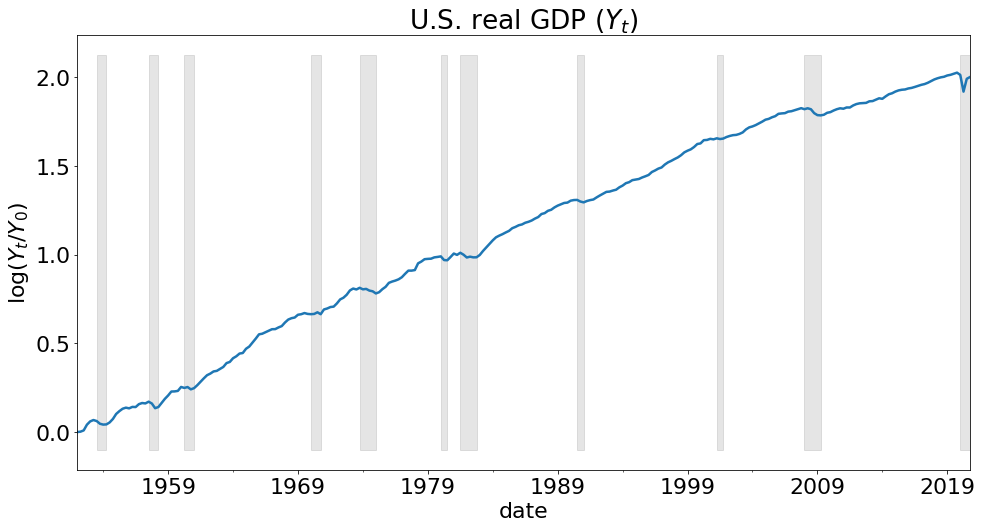

In [10]:
(np.log(series['y'])-np.log(series['y'][0])).plot()
yl, yh = plt.ylim()
plt.ylabel(r'$\log(Y_t/Y_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'U.S. real GDP ($Y_t$)')
plt.savefig(f'Export/us_log_gdp.pdf', format='pdf', transparent=True);

Over 70 years, we've grown by 2 log points, since $e^2=7.4$, we've multiplied real GDP by 7.5

In [11]:
np.exp(2)

7.38905609893065

In [12]:
print(' Real GDP at beginning = $trn ', series['y'][0], ' | end = $trn ', series['y'][-1]) 

 Real GDP at beginning = $trn  2540.55  | end = $trn  18783.902


What's the annual log growth rate? $\frac{\log(x_T)-\log(x_0)}{T/4}$

In [13]:
print('Annualized log growth rate =',(np.log(series['y'][-1])-np.log(series['y'][0]))/(NQ/4))

Annualized log growth rate = 0.02899448744062087


In [14]:
decadal_average_growth(series['y'])

Average for 1950/60 : 0.037
Average for 1970/80 : 0.032
Average for 2000/10 : 0.0199


What's the standard deviation? 

In [22]:
print('Mean growth rate real GDP =',4*np.average(np.diff(np.log(series['y']))))
print('Mean growth rate nominal GDP =',4*np.average(np.diff(np.log(series['yn']))))
print('Standard dev of growth rate real GDP =',4*np.std(np.diff(np.log(series['y']))))
print('Standard dev of growth rate nominal GDP =',4*np.std(np.diff(np.log(series['yn']))))

Mean growth rate real GDP = 0.029099921940404942
Mean growth rate nominal GDP = 0.059485689780831796
Standard dev of growth rate real GDP = 0.045643447471075176
Standard dev of growth rate nominal GDP = 0.05059497538314413


Alternative is regression

In [15]:
series['ylogfit'], regparams=reg_fit(np.log(series['y']), series['t'], verbose=False)

In [16]:
print('Best fit log growth rate (annual) =', regparams['t']*4)

Best fit log growth rate (annual) = 0.030466328322536998


Text(0.5, 1.0, 'U.S. real GDP ($Y_t$)')

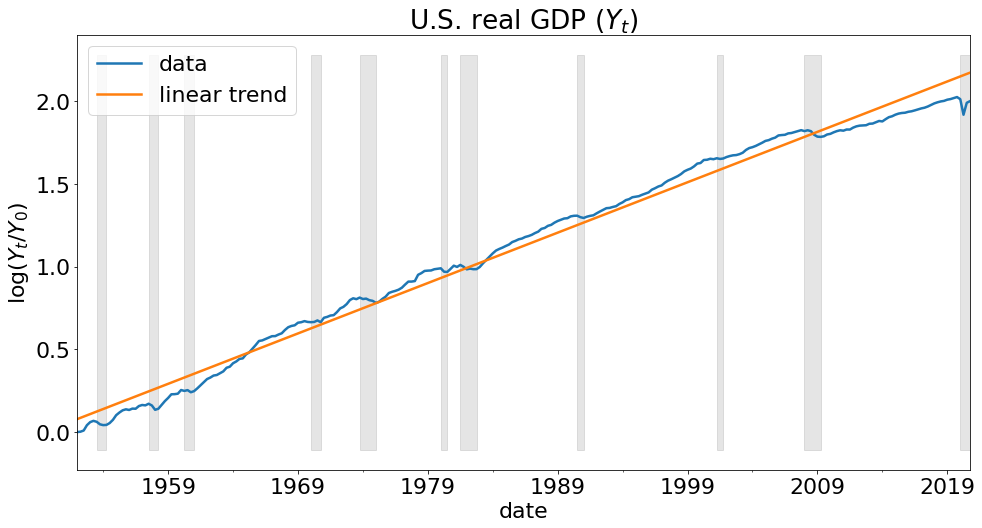

In [17]:
(np.log(series['y'])-np.log(series['y'][0])).plot(label='data')
(series['ylogfit']-np.log(series['y'][0])).plot(label='linear trend')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log(Y_t/Y_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP ($Y_t$)')

#### Examine the role of pop

In [18]:
series['poplogfit'], regparams=reg_fit(np.log(series['pop']), series['t'], verbose=False)

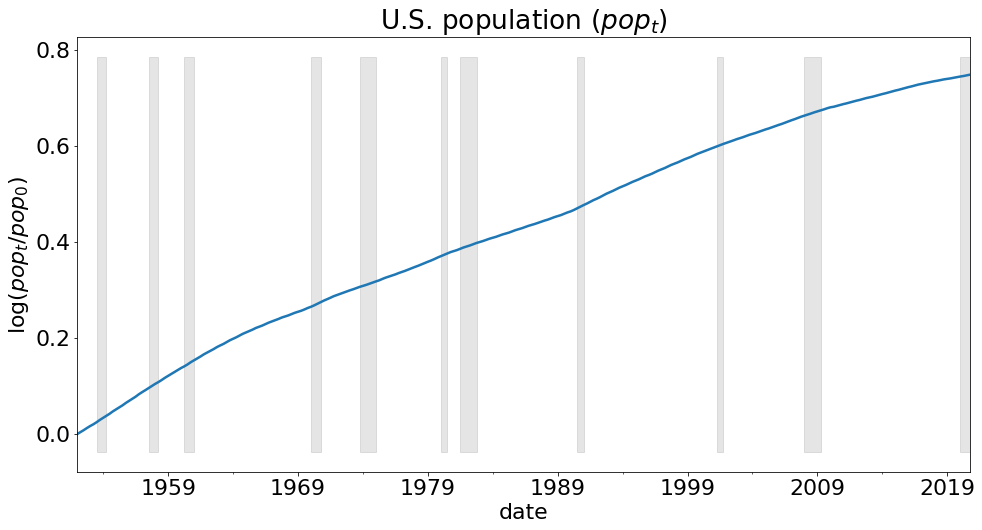

In [19]:
(np.log(series['pop'])-np.log(series['pop'][0])).plot()
#(series['poplogfit']-np.log(series['pop'][0])).plot()
yl, yh = plt.ylim()
plt.ylabel(r'$\log(pop_t/pop_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'U.S. population ($pop_t$)')
plt.savefig(f'Export/us_log_pop.pdf', format='pdf', transparent=True);

In [20]:
print('Annualized log growth rate of pop=',(np.log(series['pop'][-1])-np.log(series['pop'][0]))/(NQ/4))
print('Best fit log growth rate of pop (annual) =', regparams['t']*4)

Annualized log growth rate of pop= 0.010843358010843265
Best fit log growth rate of pop (annual) = 0.01069913730480436


In [21]:
decadal_average_growth(series['pop'])

Average for 1950/60 : 0.0146
Average for 1970/80 : 0.0106
Average for 2000/10 : 0.0079


In [22]:
(np.log(series['pop'][-1])-np.log(series['pop'][0]))

0.7481917027481853

In [23]:
np.exp(0.75)

2.117000016612675

In [24]:
series['pop'][0]

156522.33333333334

In [25]:
series['pop'][-1]

330759.13033333333

#### Now do this in per person basis

In [26]:
series['ypoplogfit'], regparams=reg_fit(np.log(series['ypop']), series['t'], verbose=False)

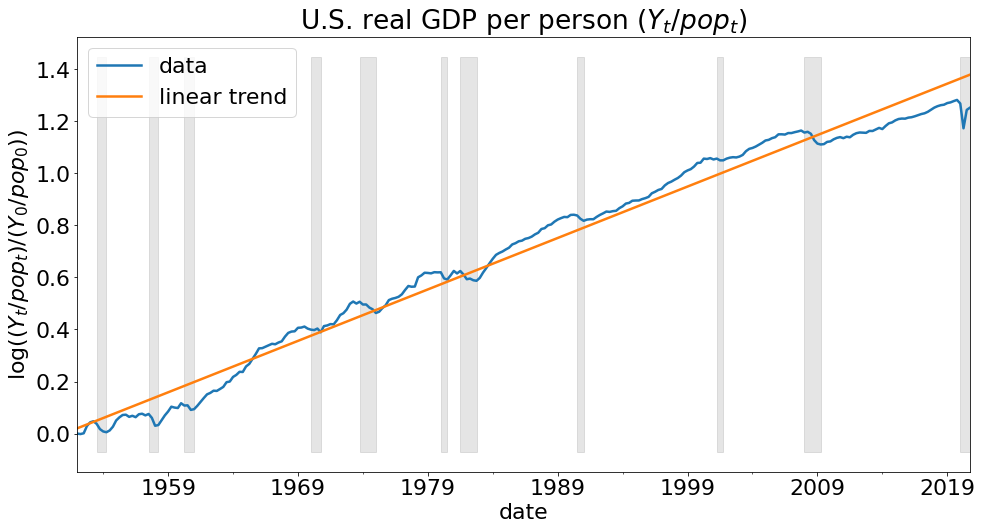

In [27]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(series['ypoplogfit']-np.log(series['ypop'][0])).plot(label='linear trend')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log((Y_t/pop_t)/(Y_0/pop_0))$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP per person ($Y_t/pop_t$)')
plt.savefig(f'Export/us_log_realgdp_trend.pdf', format='pdf', transparent=True);

In [28]:
print('Annualized log growth rate of GDP/person=',(np.log(series['ypop'][-1])-np.log(series['ypop'][0]))/(NQ/4))
print('Best fit log growth rate of y/pop (annual) =', regparams['t']*4)
decadal_average_growth(series['ypop'])

Annualized log growth rate of GDP/person= 0.018151129429777615
Best fit log growth rate of y/pop (annual) = 0.01976719101773257
Average for 1950/60 : 0.0224
Average for 1970/80 : 0.0214
Average for 2000/10 : 0.0121


Now HP filter instead

In [29]:
#cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),100000000000)
#lambdahp=100000000000
lambdahp=1600
cycle_y, trend_y=sm.tsa.filters.hpfilter(np.log(series['y']),lambdahp)
cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),lambdahp)
#trend_bk.plot()

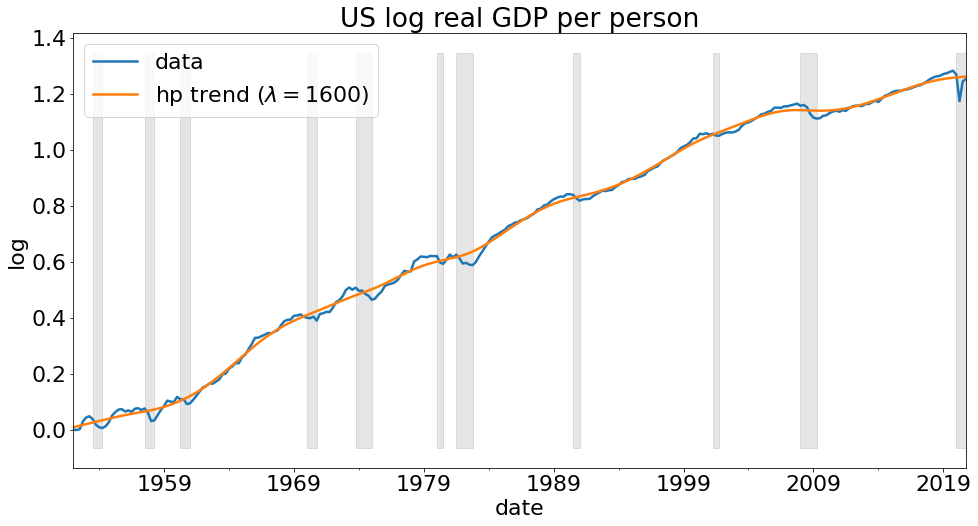

In [30]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(trend_ypop-np.log(series['ypop'][0])).plot(label=r'hp trend ($\lambda=1600$)')
yl, yh = plt.ylim()
plt.ylabel('log')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('US log real GDP per person')
plt.savefig(f'Export/us_log_realgdp_hptrend.pdf', format='pdf', transparent=True);

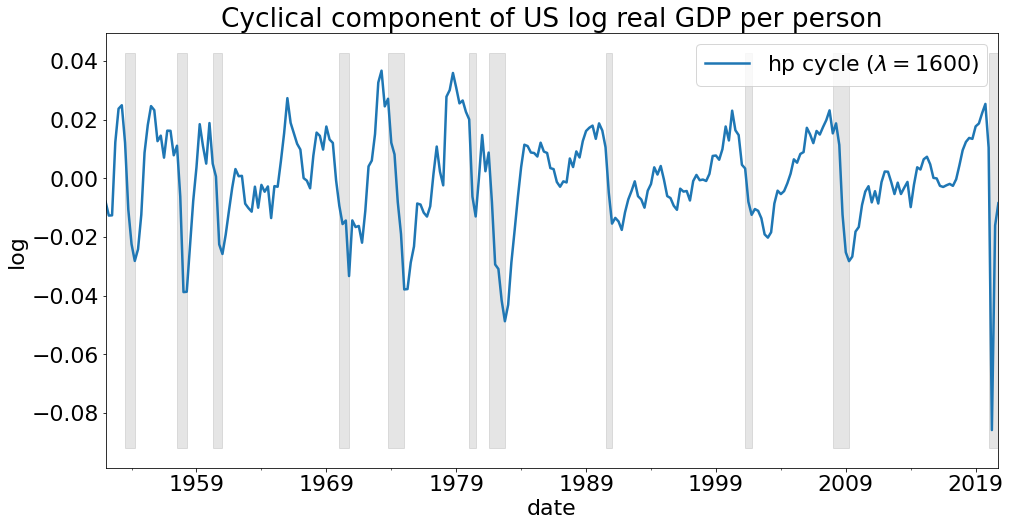

In [31]:
cycle_ypop.plot(label=r'hp cycle ($\lambda=1600$)')
yl, yh = plt.ylim()
plt.ylabel('log')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('Cyclical component of US log real GDP per person')
plt.savefig(f'Export/us_log_realgdp_cycle.pdf', format='pdf', transparent=True);

Real GDP per capita falls from 2% above trend to 3% below trend, so about 5%

Note: if we use linear instead then we are almost 15% below trend now

### Unemployment, Okun's law, basic correlations between growth rates

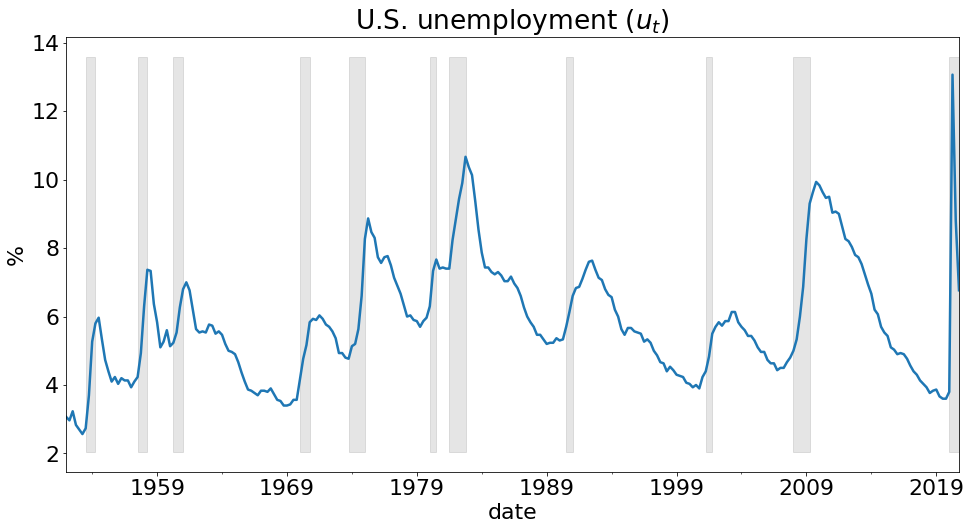

In [32]:
series['u'].plot()
yl, yh = plt.ylim()
plt.ylabel('%')
#plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'U.S. unemployment ($u_t$)')
plt.savefig(f'Export/us_unempl.pdf', format='pdf', transparent=True);

### Across selected states

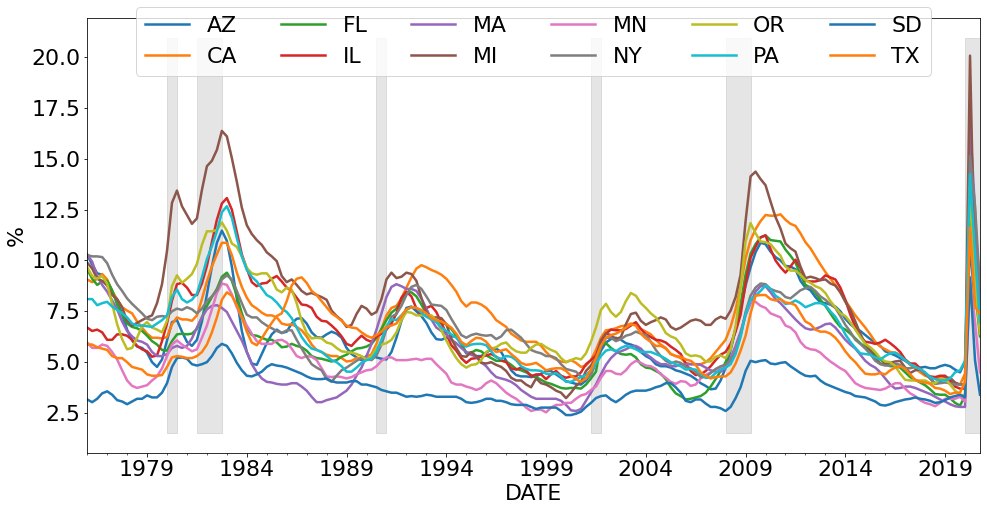

In [33]:
stateu[["AZ","CA","FL","IL","MA","MI","MN","NY","OR","PA","SD","TX"]].plot()
yl, yh = plt.ylim()
plt.ylabel('%')
#plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
#plt.legend(loc='upper center',  ncol=1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=6)
plt.savefig(f'Export/us_unempl_state.pdf', format='pdf', transparent=True);

Add national unemployment series to dataframe, take growth of u

In [34]:
stateu["nat"]=series['u']
# Last row of corr gives correlation with "nat"
natcorr=stateu.diff().iloc[1:].corr().iloc[-1]

Text(0.5, 1.0, 'Correlation between national $\\Delta u$ and state $\\Delta u$')

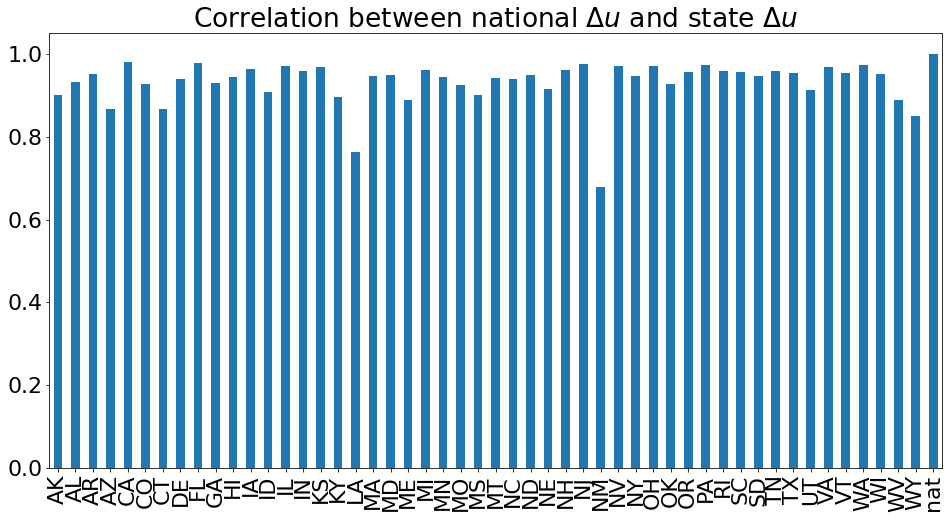

In [35]:
natcorr.plot.bar(rot=90)
plt.title('Correlation between national $\Delta u$ and state $\Delta u$')

In [36]:
# Pre-covid
seriespre=series.loc['1952-03-31':'2019-12-31']

Okun's law: change in unemployment rate vs GDP growth rate

Chad does this with unemployment gap vs output gap, but requires measures of natural rates, so not good for me. He says 
$$ u-\overline{u} = -1/2 (\log(y/ypot)) $$

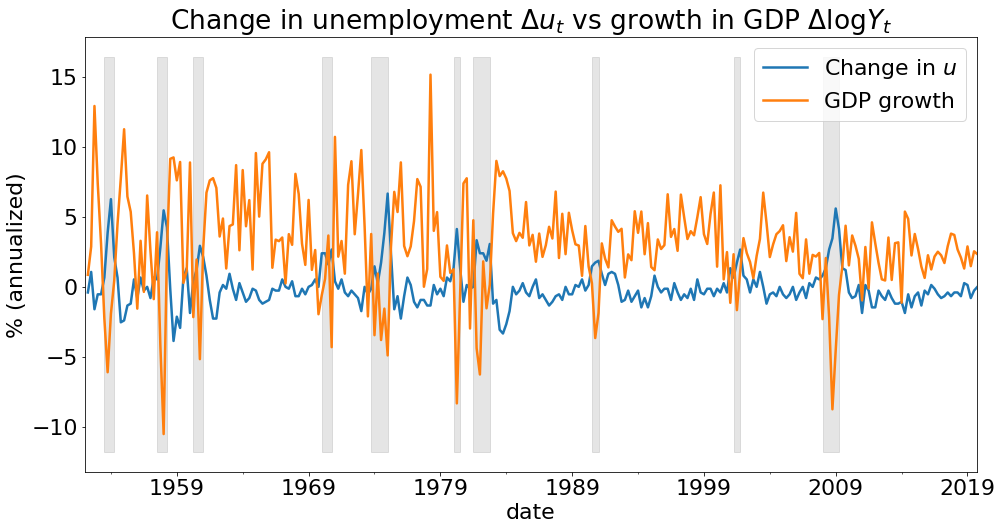

In [37]:
du=seriespre['u'].diff() # change in the unemployment rate in pp
dy=100*np.log(seriespre['y']).diff() # change in GDP in %
dc=100*np.log(seriespre['c']).diff() # change in GDP in %
di=100*np.log(seriespre['i']).diff() # change in GDP in %
dg=100*np.log(seriespre['g']).diff() # change in GDP in %
de=100*np.log(seriespre['emp']).diff() # employment 
dh=100*np.log(seriespre['h']).diff() # employment = total hours
dn=100*np.log(seriespre['h']*seriespre['emp']).diff() # hours worked per person * employment = total hours
dk=100*np.log(seriespre['k']).diff() 

duann=4*du #-du.mean()
dyann=4*dy #-dy.mean()
dcann=4*dc
diann=4*di
dgann=4*dg
dnann=4*dn
dkann=4*dk
deann=4*de
dhann=4*dh



duann.plot(label=r'Change in $u$')
dyann.plot(label=r'GDP growth')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel('% (annualized)')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'Change in unemployment $\Delta u_t$ vs growth in GDP $\Delta \log Y_t$')
plt.savefig(f'Export/okun_timeseries.pdf', format='pdf', transparent=True);

Look at correlation: -0.8

In [38]:
duy=pd.DataFrame(data={'du':duann[1:],'dy':dyann[1:], 'dc':dcann[1:], 'di':diann[1:], 'dg':dgann[1:], 'dn':dnann[1:], 'dk':dkann[1:], 'de':deann[1:], 'dh':dhann[1:]})
duy.corr()

,du,dy,dc,di,dg,dn,dk,de,dh
du,1.000000,-0.666783,-0.510455,-0.625821,-0.063641,-0.814644,-0.133305,-0.821936,-0.415078
dy,-0.666783,1.000000,0.701888,0.813881,0.246097,0.758924,0.350399,0.691935,0.521580
dc,-0.510455,0.701888,1.000000,0.338761,0.108264,0.559894,0.399604,0.526176,0.356085
di,-0.625821,0.813881,0.338761,1.000000,-0.068566,0.680711,0.168311,0.595486,0.513790
dg,-0.063641,0.246097,0.108264,-0.068566,1.000000,0.072255,0.192408,0.110255,-0.031476
dn,-0.814644,0.758924,0.559894,0.680711,0.072255,1.000000,0.321991,0.915956,0.679540
dk,-0.133305,0.350399,0.399604,0.168311,0.192408,0.321991,1.000000,0.406026,0.015693
de,-0.821936,0.691935,0.526176,0.595486,0.110255,0.915956,0.406026,1.000000,0.328036
dh,-0.415078,0.521580,0.356085,0.513790,-0.031476,0.679540,0.015693,0.328036,1.000000


Regression coefficient: -1.66 (vs simplest model would be $-\alpha$)

In [39]:
# model=sm.OLS(duy['dy'],duy['du'])
# results = model.fit()
# print(results.summary())
# fitted = model.fit().predict()

fitted, regparams=reg_fit(duy['dy'],duy['du'], verbose=True)


                            OLS Regression Results                            
Dep. Variable:                     dy   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     215.3
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           3.24e-36
Time:                        20:27:23   Log-Likelihood:                -645.31
No. Observations:                 271   AIC:                             1295.
Df Residuals:                     269   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0021      0.160     18.810      0.0

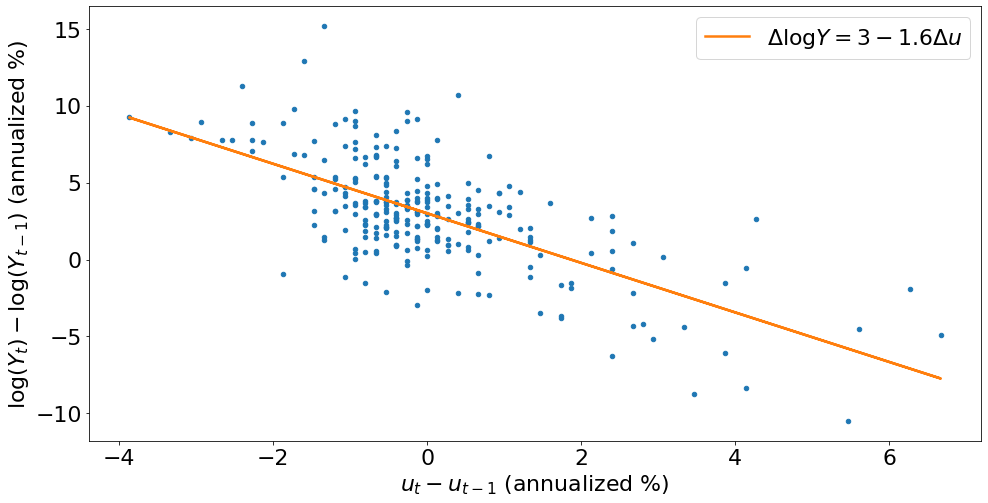

In [40]:
duy.plot.scatter(x='du', y='dy')
plt.plot(duy['du'], fitted, color='tab:orange', label=r'$\Delta \log Y = 3 - 1.6 \Delta u$')
plt.xlabel(r'$u_t - u_{t-1}$ (annualized %)')
plt.ylabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.legend()
plt.savefig(f'Export/okun_cross_X.pdf', format='pdf', transparent=True);

So, best summary of Okun's law in data at the Q level is
$$ dlogy_t = 0.75 -1.6 du_t$$

This means that growth in y is $2.5\% - 1.6* change in u$ this year. 
- Annual level: unemployment rate changes this year (say from 7 to 10pp), the gdp growth rate tends to fall by 1.5*3=4.5pp (from 1.5 to -3)
- Longer period, tends to attenuate. Eg, unemployment rate in the recession frose from 4 to 10 (by 6), GDP growth rate fell from 3 to -3

                            OLS Regression Results                            
Dep. Variable:                     dc   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     261.2
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           1.60e-41
Time:                        20:27:23   Log-Likelihood:                -569.36
No. Observations:                 271   AIC:                             1143.
Df Residuals:                     269   BIC:                             1150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5913      0.158     10.049      0.0

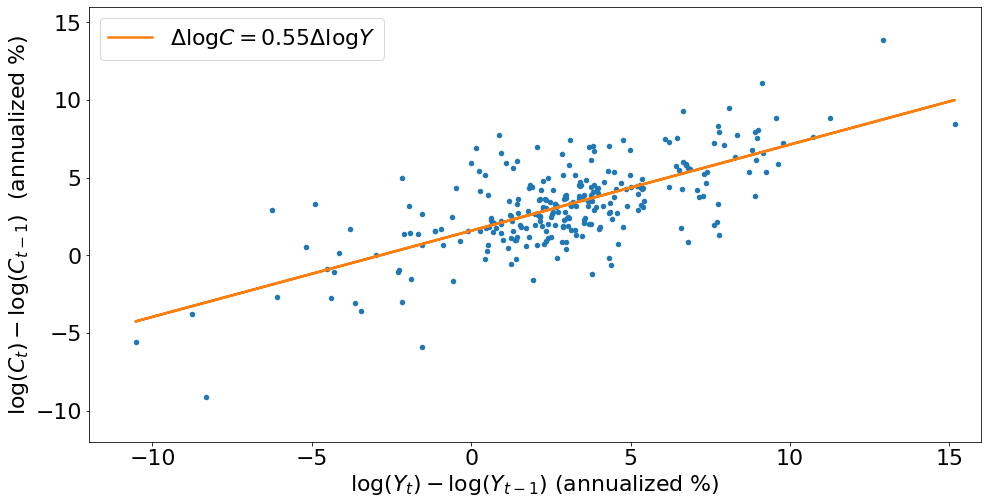

In [41]:
fitted, regparams=reg_fit(duy['dc'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dc')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log C = 0.55 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(C_t)-\log(C_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.savefig(f'Export/okun_C_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     di   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     527.8
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           2.21e-65
Time:                        20:27:23   Log-Likelihood:                -993.13
No. Observations:                 271   AIC:                             1990.
Df Residuals:                     269   BIC:                             1997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5124      0.756     -9.931      0.0

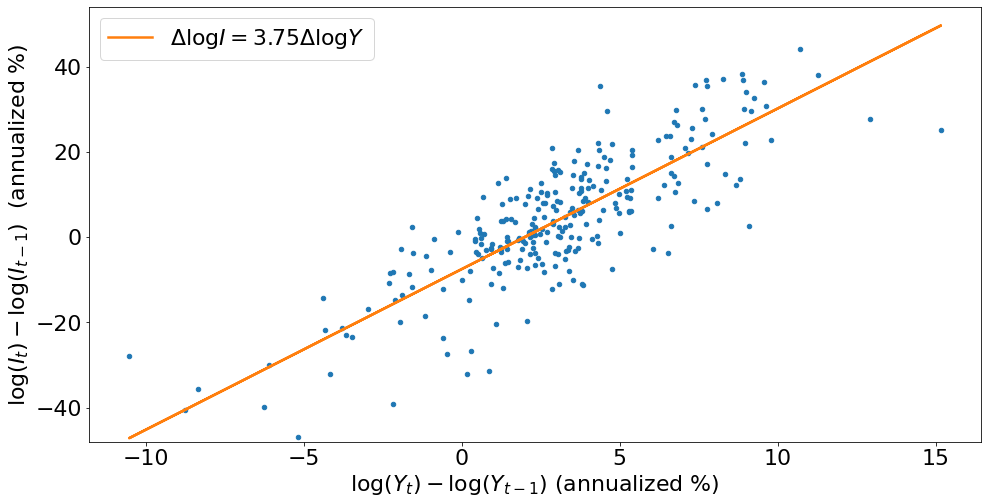

In [42]:
fitted, regparams=reg_fit(duy['di'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='di')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log I = 3.75 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(I_t)-\log(I_{t-1})$  (annualized %)')
plt.legend()
plt.ylim(-12,16)
plt.ylim(-48,54)
plt.savefig(f'Export/okun_I_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dg   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     17.34
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           4.21e-05
Time:                        20:27:24   Log-Likelihood:                -771.53
No. Observations:                 271   AIC:                             1547.
Df Residuals:                     269   BIC:                             1554.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9219      0.334      2.761      0.0

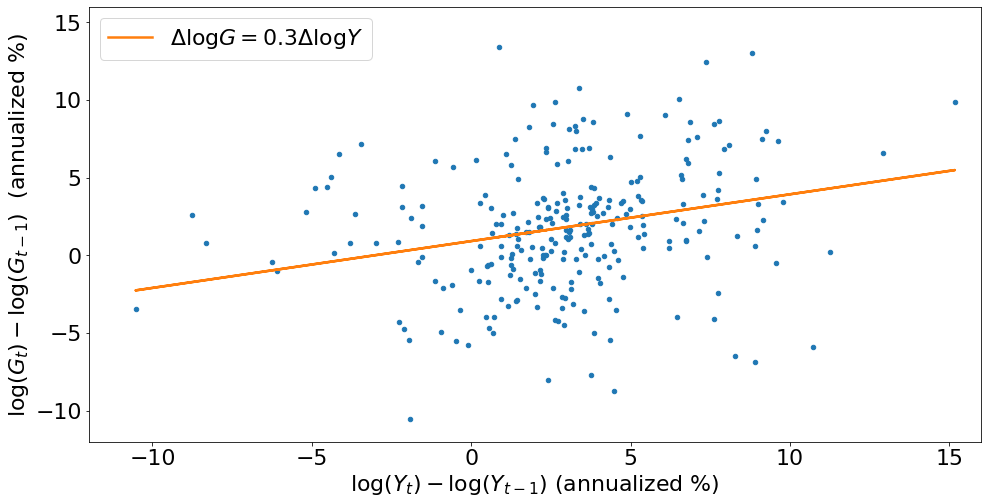

In [43]:
fitted, regparams=reg_fit(duy['dg'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dg')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log G = 0.3 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(G_t)-\log(G_{t-1})$  (annualized %)')
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.legend()
plt.savefig(f'Export/okun_G_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dn   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     365.4
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           4.91e-52
Time:                        20:27:24   Log-Likelihood:                -568.36
No. Observations:                 271   AIC:                             1141.
Df Residuals:                     269   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5118      0.158     -3.244      0.0

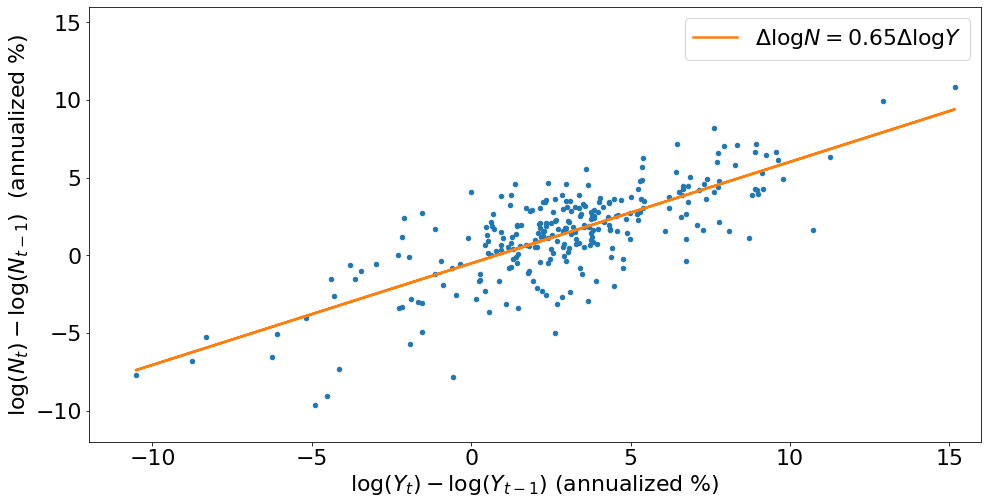

In [44]:
fitted, regparams=reg_fit(duy['dn'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dn')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log N = 0.65 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(N_t)-\log(N_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.savefig(f'Export/okun_N_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     de   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     247.1
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           6.09e-40
Time:                        20:27:25   Log-Likelihood:                -527.81
No. Observations:                 271   AIC:                             1060.
Df Residuals:                     269   BIC:                             1067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3013      0.136      2.218      0.0

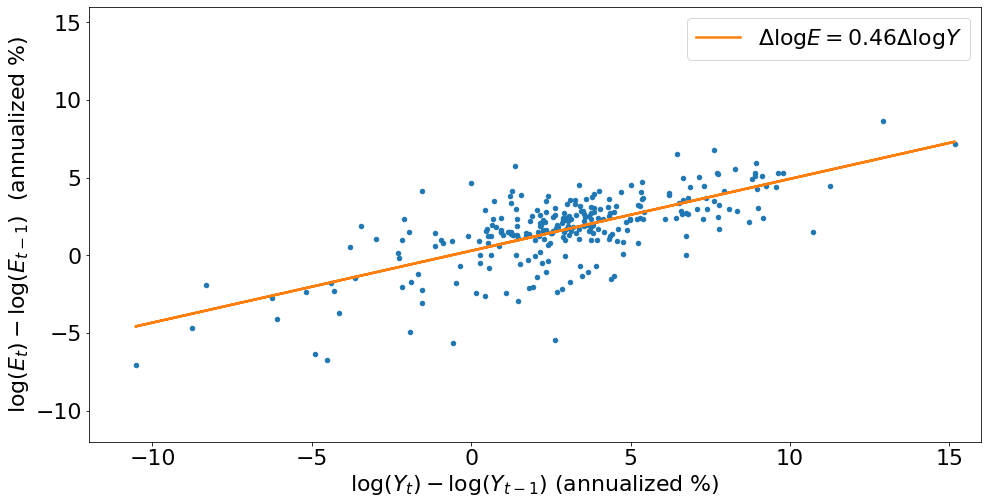

In [45]:
fitted, regparams=reg_fit(duy['de'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='de')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log E = 0.46 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(E_t)-\log(E_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.savefig(f'Export/okun_E_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dh   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     100.5
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           2.62e-20
Time:                        20:27:25   Log-Likelihood:                -409.56
No. Observations:                 271   AIC:                             823.1
Df Residuals:                     269   BIC:                             830.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8130      0.088     -9.259      0.0

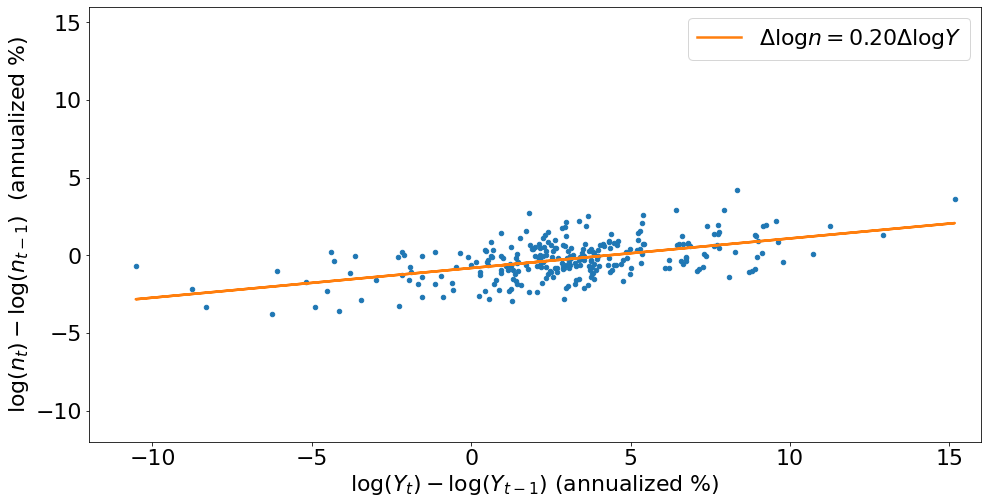

In [46]:
fitted, regparams=reg_fit(duy['dh'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dh')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log n = 0.20 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(n_t)-\log(n_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.savefig(f'Export/okun_h_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dk   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     37.65
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           3.02e-09
Time:                        20:27:25   Log-Likelihood:                -329.63
No. Observations:                 271   AIC:                             663.3
Df Residuals:                     269   BIC:                             670.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4153      0.065     36.941      0.0

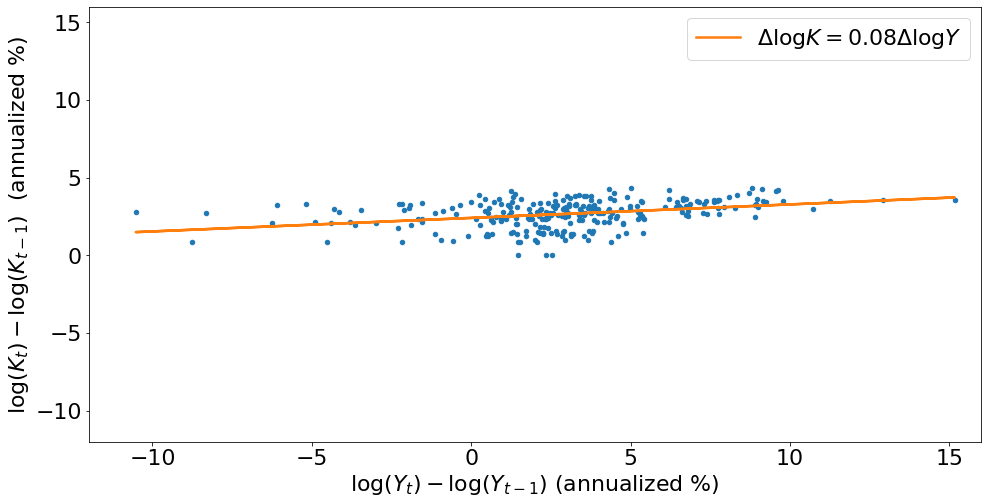

In [47]:
fitted, regparams=reg_fit(duy['dk'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dk')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log K = 0.08 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(K_t)-\log(K_{t-1})$  (annualized %)')
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.legend()
plt.savefig(f'Export/okun_K_Y.pdf', format='pdf', transparent=True);

### Contributions to growth in each recession

Verify national accounting identity in original nominal series

In [48]:
series["sumyn"]=series["cn"]+series["in"]+series["gn"]+series["expn"]-series["impn"]
np.max((series["yn"]-series["sumyn"])/series["yn"])

2.946922970478305e-06

So this is accurate to the 6th digit

Do this at a monthly level and with the same deflator everywhere, so as to preserve adding up

In [49]:
seriesm = data_load.get_fred_data('M','same_def')

Check that we do add up all components

In [50]:
seriesm["sumyn"]=seriesm["cn"]+seriesm["in"]+seriesm["gn"]+seriesm["expn"]-seriesm["impn"]
np.max((seriesm["yn"]-seriesm["sumyn"])/seriesm["yn"])

3.6951228071090824e-06

Construct indicator = 1 if recession begins this month, -1 if it ends this month

In [51]:
seriesm["USREC"].loc['1948-10-31':'1949-01-31']

DATE
1948-10-31    0.0
1948-11-30    0.0
1948-12-31    1.0
1949-01-31    1.0
Freq: M, Name: USREC, dtype: float64

Note the official NBER [webpage](https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions) says that the peak was in November 1948 and trough in October 1949, so make sure our dating is consistent with that

In [52]:
begrec=seriesm["USREC"].diff().shift(-1)

In [53]:
begrec.loc['1948-10-31':'1949-01-31']

DATE
1948-10-31    0.0
1948-11-30    1.0
1948-12-31    0.0
1949-01-31    0.0
Freq: M, Name: USREC, dtype: float64

In [54]:
begrec.loc['1949-09-30':'1949-12-31']

DATE
1949-09-30    0.0
1949-10-31   -1.0
1949-11-30    0.0
1949-12-31    0.0
Freq: M, Name: USREC, dtype: float64

Now store beginning and ends

In [55]:
beg=seriesm.loc[(begrec==1).to_numpy()].rename(columns={"y":"y_start", "i":"i_start", "c":"c_start", "g":"g_start", "imp":"imp_start", "exp":"exp_start"})

In [56]:
end=seriesm.loc[(begrec==-1).to_numpy()].rename(columns={"y":"y_end", "i":"i_end", "c":"c_end", "g":"g_end", "imp":"imp_end", "exp":"exp_end"})

Add date to `end`

In [57]:
end["date_end"]=end.index

In [58]:
end['y_end']

DATE
1949-10-31     2102.283850
1954-05-31     2662.663950
1958-04-30     2925.362588
1961-02-28     3272.248404
1970-11-30     4980.785829
1975-03-31     5574.679614
1980-07-31     6688.872497
1982-11-30     6832.542294
1991-03-31     9317.618948
2001-11-30    13319.647072
2009-06-30    15170.828972
Name: y_end, dtype: float64

In [59]:
startend=pd.concat([beg[["y_start","i_start", "c_start", "g_start", "imp_start", "exp_start"]],end[["y_end","i_end", "c_end", "g_end", "imp_end", "exp_end","date_end"]]])

In [60]:
startend.sort_index(inplace=True)

In [61]:
for i in ["y_end","i_end", "c_end", "g_end","imp_end", "exp_end", "date_end"]:
    startend[i]=startend[i].shift(-1)

In [62]:
startend.dropna(inplace=True)

In [63]:
startend.head()

,y_start,i_start,c_start,g_start,imp_start,exp_start,y_end,i_end,c_end,g_end,imp_end,exp_end,date_end
DATE,,,,,,,,,,,,,
1948-11-30,2125.225042,370.767431,1354.541525,360.552815,75.909068,115.272339,2102.283850,291.058805,1400.209741,387.710712,70.628447,93.925270,1949-10-31
1953-07-31,2703.324119,424.568072,1614.830684,667.740152,112.695232,108.880442,2662.663950,388.831918,1639.098588,632.261313,109.121707,111.598416,1954-05-31
1957-08-31,3004.513547,481.367475,1818.552899,680.745133,123.961193,147.811328,2925.362588,403.278790,1814.918805,704.251890,124.426677,127.345977,1958-04-30
1960-04-30,3258.144156,524.453544,2000.409466,712.831938,141.235624,161.678810,3272.248404,478.959613,2005.398795,755.016007,129.680447,162.554435,1961-02-28
1969-12-31,4939.054194,798.601893,2962.847168,1161.601610,251.879345,267.884440,4980.785829,786.435198,3006.643309,1171.858412,262.284408,278.133317,1970-11-30


In [64]:
startend["dy"]=100*(startend['y_end']-startend['y_start'])/startend['y_start']
startend["dc"]=100*(startend['c_end']-startend['c_start'])/startend['y_start']
startend["di"]=100*(startend['i_end']-startend['i_start'])/startend['y_start']
startend["dg"]=100*(startend['g_end']-startend['g_start'])/startend['y_start']
startend["dexp"]=100*(startend['exp_end']-startend['exp_start'])/startend['y_start']
startend["-dimp"]=-100*(startend['imp_end']-startend['imp_start'])/startend['y_start']
startend["sum"]=startend["dc"]+startend["di"]+startend["dg"]+startend["dexp"]+startend["-dimp"]

## Now show contribution to growth in each recession

In [65]:
startend[["date_end","dy","sum","dc","di","dg","dexp","-dimp"]].round(1)

,date_end,dy,sum,dc,di,dg,dexp,-dimp
DATE,,,,,,,,
1948-11-30,1949-10-31,-1.1,-1.1,2.1,-3.8,1.3,-1.0,0.2
1953-07-31,1954-05-31,-1.5,-1.5,0.9,-1.3,-1.3,0.1,0.1
1957-08-31,1958-04-30,-2.6,-2.6,-0.1,-2.6,0.8,-0.7,-0.0
1960-04-30,1961-02-28,0.4,0.4,0.2,-1.4,1.3,0.0,0.4
1969-12-31,1970-11-30,0.8,0.8,0.9,-0.2,0.2,0.2,-0.2
1973-11-30,1975-03-31,-2.4,-2.4,0.4,-4.2,0.8,0.8,-0.1
1980-01-31,1980-07-31,-2.2,-2.2,-0.6,-2.9,-0.1,0.1,1.3
1981-07-31,1982-11-30,-2.1,-2.1,1.6,-4.2,1.0,-1.6,1.1
1990-07-31,1991-03-31,-0.9,-0.9,-0.4,-1.6,0.4,0.3,0.5


### Now log and HP

Log and HP filter the series

In [66]:
filtseries = dict()
# HP filters of logs
for r in ['y', 'c', 'g', 'i', 'gdpdef', 'emp', 'h','labprod', 'w']:
    cycle, trend= sm.tsa.filters.hpfilter(np.log(series[r]),100)
    filtseries[r] = cycle

# just levels
for r in ['pce_infl', 'fedfunds', 'u']:
    filtseries[r] = series[r]/100


# verify units
df = pd.DataFrame(filtseries)
df.tail()

,y,c,g,i,gdpdef,emp,h,labprod,w,pce_infl,fedfunds,u
date,,,,,,,,,,,,
2019-12-31,0.025259,0.027247,0.006757,0.017839,0.001801,0.031360,0.000354,-0.004284,-0.017073,0.013,0.016433,0.036000
2020-03-31,0.015047,0.012311,0.006317,-0.002028,0.002166,0.039997,-0.003634,-0.012031,-0.008478,0.016,0.012600,0.038000
2020-06-30,-0.076168,-0.085263,0.009353,-0.155640,-0.006765,-0.078869,-0.012796,0.008458,0.032942,-0.008,0.000600,0.130667
2020-09-30,-0.001316,0.003653,-0.005943,0.002013,-0.001366,-0.017543,0.001985,0.012840,0.004973,0.034,0.000933,0.088000
2020-12-31,0.011326,0.012324,-0.011496,0.062233,-0.000130,0.003725,0.009725,-0.003816,-0.004136,0.014,0.000900,0.067667


In [67]:
series

,yn,cn,gn,in,nxn,impn,expn,y,c,g,...,totres,ioer,dgs10,breakeven10,ypop,t,ylogfit,poplogfit,ypoplogfit,sumyn
date,,,,,,,,,,,,,,,,,,,,,
1952-03-31,359.820,212.969,84.998,58.132,3.721,14.958,18.679,2540.550,1476.743,970.486,...,NaN,NaN,NaN,NaN,0.016231,0,7.918452,12.019056,-4.100604,359.820
1952-06-30,361.030,217.088,88.987,53.004,1.951,14.630,16.581,2546.022,1505.663,1003.558,...,NaN,NaN,NaN,NaN,0.016202,1,7.926068,12.021731,-4.095662,361.030
1952-09-30,367.701,219.553,90.931,57.220,-0.004,15.250,15.246,2564.401,1512.885,1013.710,...,NaN,NaN,NaN,NaN,0.016251,2,7.933685,12.024405,-4.090721,367.700
1952-12-31,380.812,227.670,93.418,60.737,-1.013,16.342,15.329,2648.621,1566.256,1030.617,...,NaN,NaN,NaN,NaN,0.016710,3,7.941301,12.027080,-4.085779,380.812
1953-03-31,387.980,231.220,95.764,61.663,-0.667,15.795,15.128,2697.855,1584.651,1063.267,...,NaN,NaN,NaN,NaN,0.016950,4,7.948918,12.029755,-4.080837,387.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,21747.394,14759.183,3805.331,3732.637,-549.757,3065.428,2515.671,19253.959,13353.687,3337.460,...,1613.533333,1.631522,1.791935,1.638548,0.058501,271,9.982545,12.743922,-2.761377,21747.394
2020-03-31,21561.139,14545.460,3834.115,3675.871,-494.307,2933.016,2438.710,19010.848,13118.406,3347.857,...,1847.166667,1.254396,1.365000,1.428226,0.057700,272,9.990162,12.746597,-2.756435,21561.140
2020-06-30,19520.114,13097.348,3839.326,3128.603,-545.164,2333.329,1788.166,17302.511,11860.250,3368.732,...,3071.600000,0.100000,0.687619,1.166508,0.052459,273,9.997779,12.749272,-2.751493,19520.114


## Plot some series vs trends

In [68]:
filtseries = dict()
seriespre=series.loc['1952-03-31':'2019-12-31']

# HP filters of logs
for r in ['y', 'c', 'g', 'i', 'gdpdef', 'emp', 'h','labprod', 'w']:
    cycle, trend= sm.tsa.filters.hpfilter(np.log(seriespre[r]),100)
    filtseries[r] = cycle

# verify units
filtseries = pd.DataFrame(filtseries)

Procyclical variables

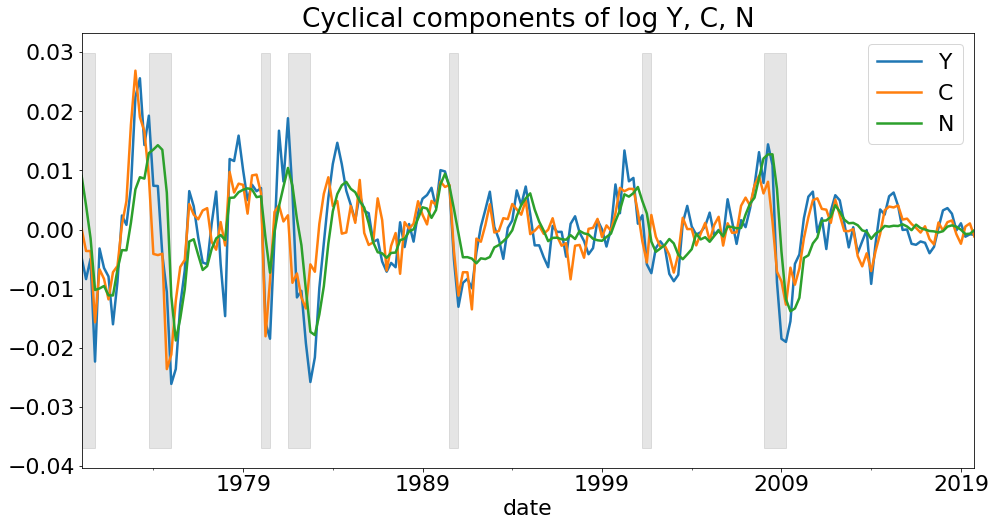

In [69]:
filtseries['y'].plot(label='Y')
filtseries['c'].plot(label='C')
filtseries['emp'].plot(label='N')
#filtseries['i'].plot(label='I')
yl, yh = plt.ylim()
plt.xlim('1970-03-31','2019-12-31')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('Cyclical components of log Y, C, N')
plt.savefig(f'Export/us_log_realgdp_components.pdf', format='pdf', transparent=True);

### Historical CPI data

In [70]:
df_cpi = data_load.get_historical_cpi()

In [71]:
df_cpi["cpi"][2020]/df_cpi["cpi"][1774]

33.09590792838875

In [72]:
df_cpi["cpi"][1933]

12.96

In [73]:
np.exp(3)

20.085536923187668

In [74]:
df_cpi["cpi"][2020]/df_cpi["cpi"][1933]

19.969907407407405

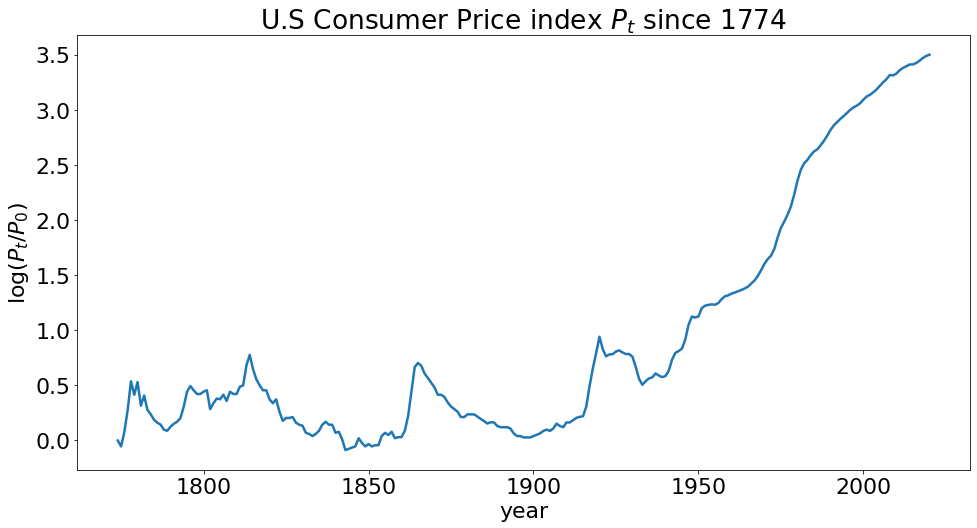

In [75]:
(np.log(df_cpi['cpi'])-np.log(df_cpi['cpi'][1774])).plot()
plt.title(r"U.S Consumer Price index $P_t$ since 1774")
plt.ylabel(r'$\log(P_t/P_{0})$')
plt.savefig(f'Export/us_log_cpi.pdf', format='pdf', transparent=True);

In [76]:
np.exp(3.5)

33.11545195869231

Text(0, 0.5, '$100 \\Delta \\log(P_t)$')

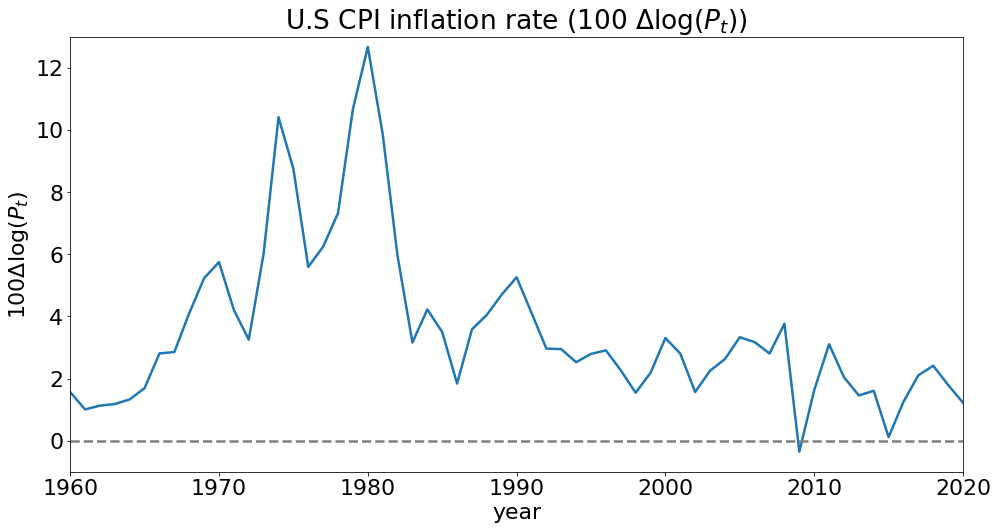

In [77]:
(100* np.log(df_cpi['cpi']).diff()).plot()
plt.title(r"U.S CPI inflation rate (100 $\Delta \log(P_t)$)")
plt.axhline(0, linestyle='--', color='gray')
plt.xlim(1960,2020)
plt.ylim(-1,13)
plt.ylabel(r'$100 \Delta \log(P_t)$')
#plt.savefig(f'Export/us_log_infl.pdf', format='pdf', transparent=True);

In [78]:
series['cpi'].diff()

date
1952-03-31         NaN
1952-06-30    0.070000
1952-09-30    0.180000
1952-12-31    0.030000
1953-03-31   -0.076667
                ...   
2019-12-31    1.668000
2020-03-31    0.640333
2020-06-30   -2.028000
2020-09-30    2.949333
2020-12-31    1.561667
Freq: Q-DEC, Name: cpi, Length: 276, dtype: float64

In [79]:
yoy=100*(series['cpi']-series['cpi'].shift(4))/series['cpi'].shift(4)

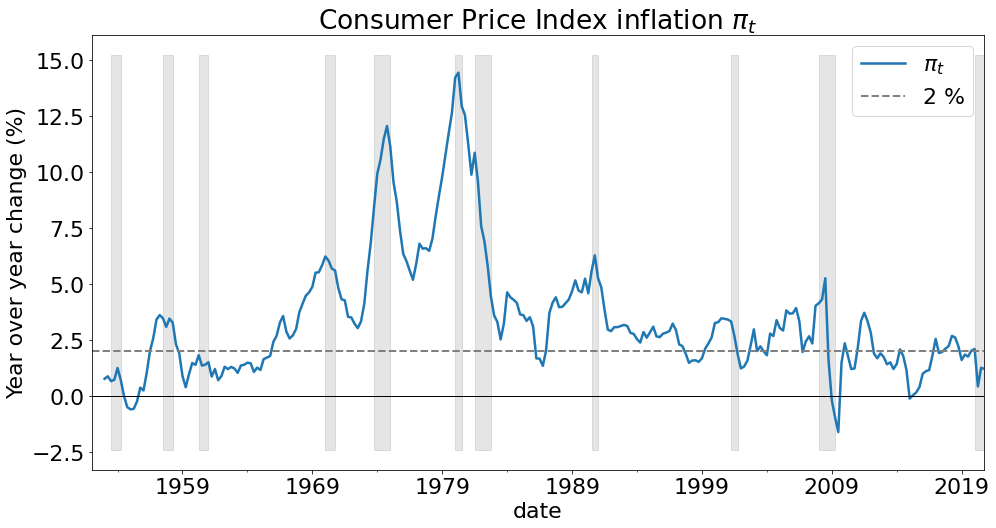

In [80]:
plt.figure
yoy.plot(label=r'$\pi_t$')
yl, yh = plt.ylim()
plt.title(r'Consumer Price Index inflation $\pi_t$')
plt.ylabel(r'Year over year change (%)')
plt.axhline(2, linestyle='--', color='gray', linewidth=2, label=r'2 %')
plt.legend()
plt.axhline(0, color='black', linewidth=1)
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.savefig(f'Export/us_infl.pdf', format='pdf', transparent=True);

### Money

In [81]:
m1data=series[['m2','m1', 'currcir','USREC','cpi', 'yn']]['2000-01':]

Levels

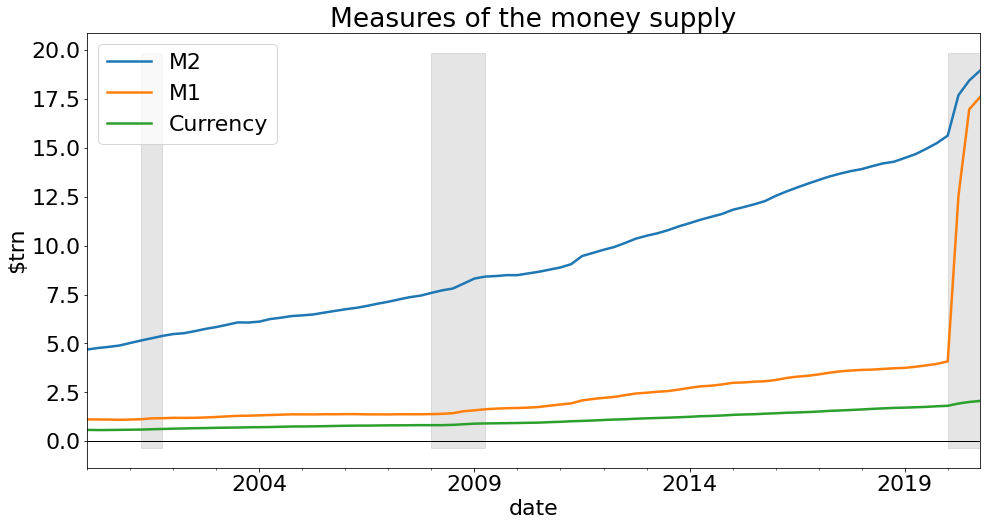

In [82]:
plt.figure()
(m1data['m2']/1000).plot(label='M2')
(m1data['m1']/1000).plot(label='M1')
(m1data['currcir']/1000).plot(label='Currency')
plt.axhline(0, color='black', linewidth=1)
yl, yh = plt.ylim()
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.legend()
plt.title(r'Measures of the money supply')
plt.ylabel(r'$trn')
plt.savefig(f'Export/us_m1.pdf', format='pdf', transparent=True);

In [83]:
m1data['2020-03':]

,m2,m1,currcir,USREC,cpi,yn
date,,,,,,
2020-03-31,15626.166667,4079.366667,1807.014667,0.333333,258.500000,21561.139
2020-06-30,17698.666667,12555.566667,1924.159667,1.000000,256.472000,19520.114
2020-09-30,18446.400000,16972.900000,2003.012667,1.000000,259.421333,21170.252
2020-12-31,18949.633333,17596.166667,2055.453333,1.000000,260.983000,21487.896


<AxesSubplot:xlabel='date'>

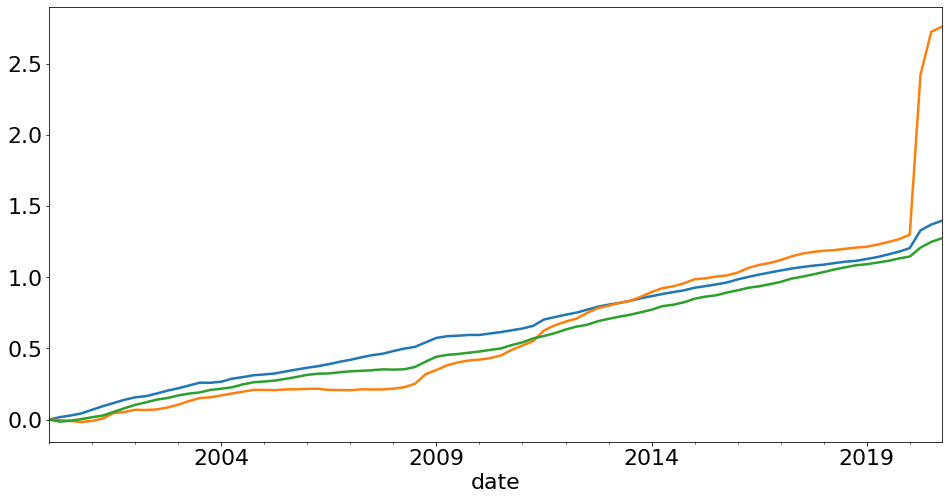

In [84]:
plt.figure()
(np.log(m1data['m2'])-np.log(m1data['m2'][0])).plot(label='M2')
(np.log(m1data['m1'])-np.log(m1data['m1'][0])).plot(label='M1')
(np.log(m1data['currcir'])-np.log(m1data['currcir'][0])).plot(label='curr')
#(m1data['m1']/1000).plot(label='M1')
#(m1data['currcir']/1000).plot(label='Currency')

Annualized growth rate

In [85]:
NQ1=m1data.index.size 

In [86]:
print('Annualized log growth rate M2 =',(np.log(m1data['m2'][-1])-np.log(m1data['m2'][0]))/(NQ1/4))
print('Annualized log growth rate M1 =',(np.log(m1data['m1'][-1])-np.log(m1data['m1'][0]))/(NQ1/4))
print('Annualized log growth rate curr =',(np.log(m1data['currcir'][-1])-np.log(m1data['currcir'][0]))/(NQ1/4))
print('Annualized log growth rate prices =',(np.log(m1data['cpi'][-1])-np.log(m1data['cpi'][0]))/(NQ1/4))
print('Annualized log growth rate GDP =',(np.log(m1data['yn'][-2])-np.log(m1data['yn'][0]))/((NQ1-1)/4))

Annualized log growth rate M2 = 0.06653426042700754
Annualized log growth rate M1 = 0.1314696011617718
Annualized log growth rate curr = 0.06067406298079109
Annualized log growth rate prices = 0.02038422722380684
Annualized log growth rate GDP = 0.0361313848927024


In [87]:
m1data

,m2,m1,currcir,USREC,cpi,yn
date,,,,,,
2000-03-31,4685.933333,1112.733333,574.842667,0.000000,170.100000,10002.857
2000-06-30,4764.600000,1107.700000,566.301000,0.000000,171.433333,10247.679
2000-09-30,4820.633333,1101.133333,570.402000,0.000000,173.000000,10319.825
2000-12-31,4891.833333,1093.233333,576.533333,0.000000,174.233333,10439.025
2001-03-31,5020.600000,1102.266667,584.237333,0.000000,175.900000,10472.879
...,...,...,...,...,...,...
2019-12-31,15248.166667,3951.200000,1783.115333,0.000000,257.859667,21747.394
2020-03-31,15626.166667,4079.366667,1807.014667,0.333333,258.500000,21561.139
2020-06-30,17698.666667,12555.566667,1924.159667,1.000000,256.472000,19520.114


### Reserves

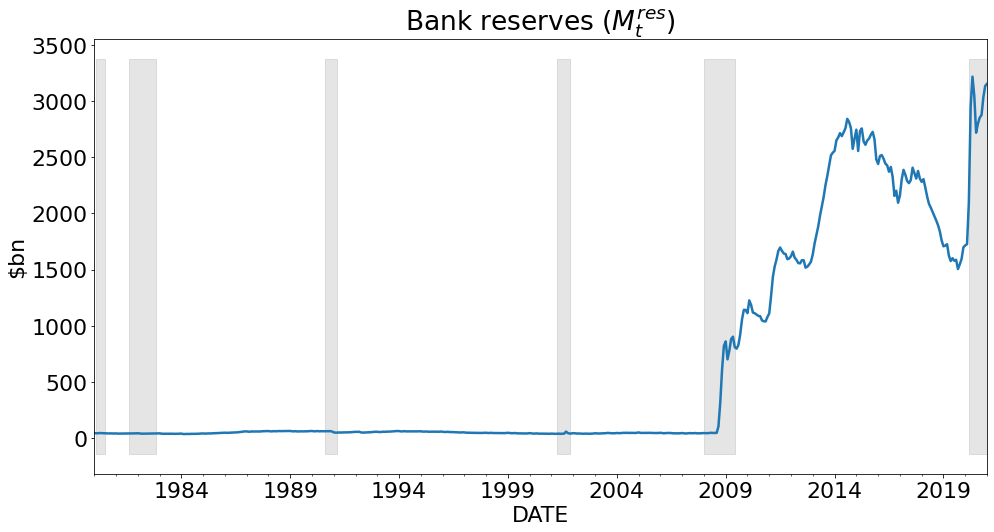

In [88]:
seriesm['totres'].plot()
yl, yh = plt.ylim()
plt.ylabel('$bn')
# Draw shaded for recession
plt.fill_between(seriesm.index, yl, yh, where=seriesm['USREC'].values, color='k', alpha=0.1)
plt.xlim('1980-01-01','2021-01-01')
plt.title(r'Bank reserves ($M_t^{res}$)')
plt.savefig(f'Export/reserves.pdf', format='pdf', transparent=True);

Replace IOER series with 0s

In [89]:
seriesm['ioer'].fillna(0, inplace=True)

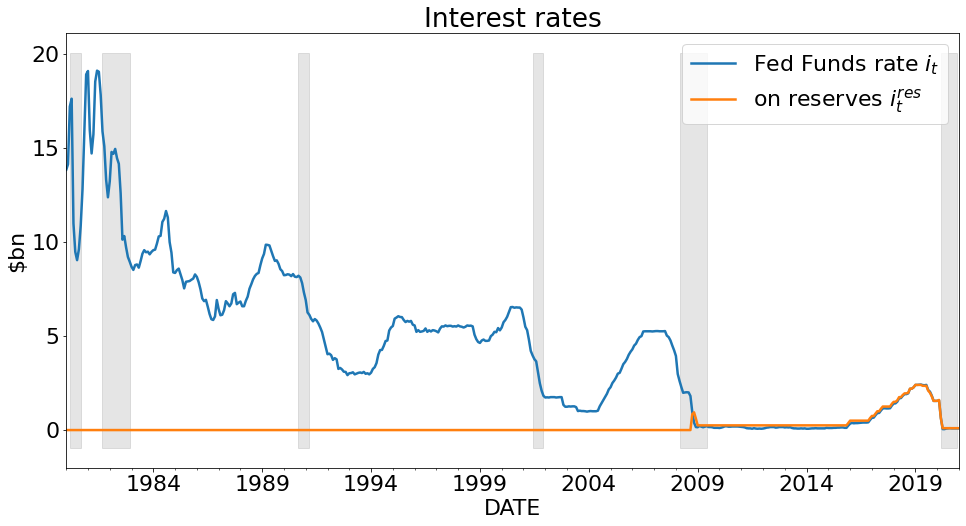

In [90]:
seriesm['fedfunds'].plot(label=r'Fed Funds rate $i_t$')
seriesm['ioer'].plot(label=r'on reserves $i_t^{res}$')
yl, yh = plt.ylim()
plt.ylabel('$bn')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.xlim('1980-01-01','2021-01-01')
plt.title(r'Interest rates')
plt.savefig(f'Export/intrates.pdf', format='pdf', transparent=True);

### Output gap

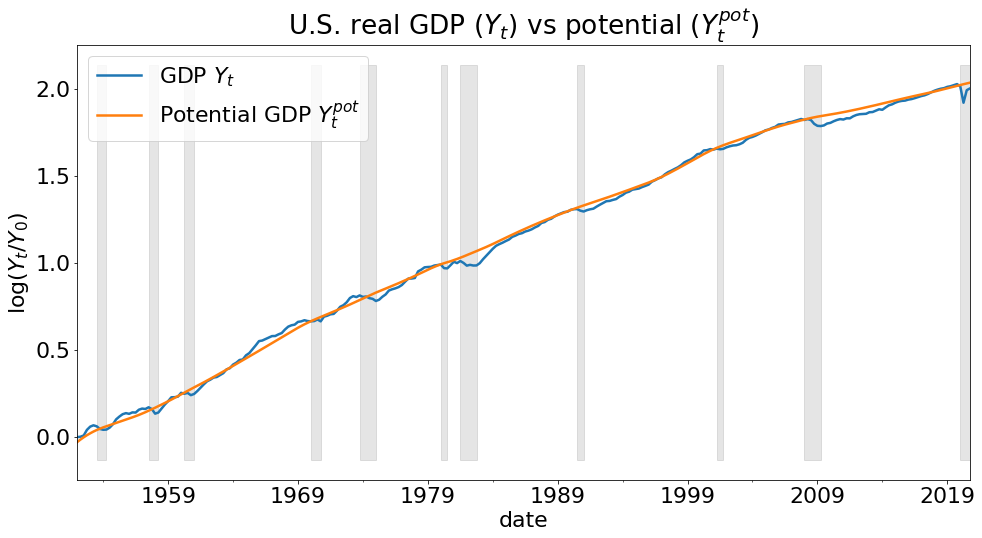

In [91]:
(np.log(series['y'])-np.log(series['y'][0])).plot(label='GDP $Y_t$')
(np.log(series['ypot'])-np.log(series['y'][0])).plot(label='Potential GDP $Y_t^{pot}$')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log(Y_t/Y_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP ($Y_t$) vs potential ($Y_t^{pot}$)')
plt.savefig(f'Export/gdp_v_potential.pdf', format='pdf', transparent=True);

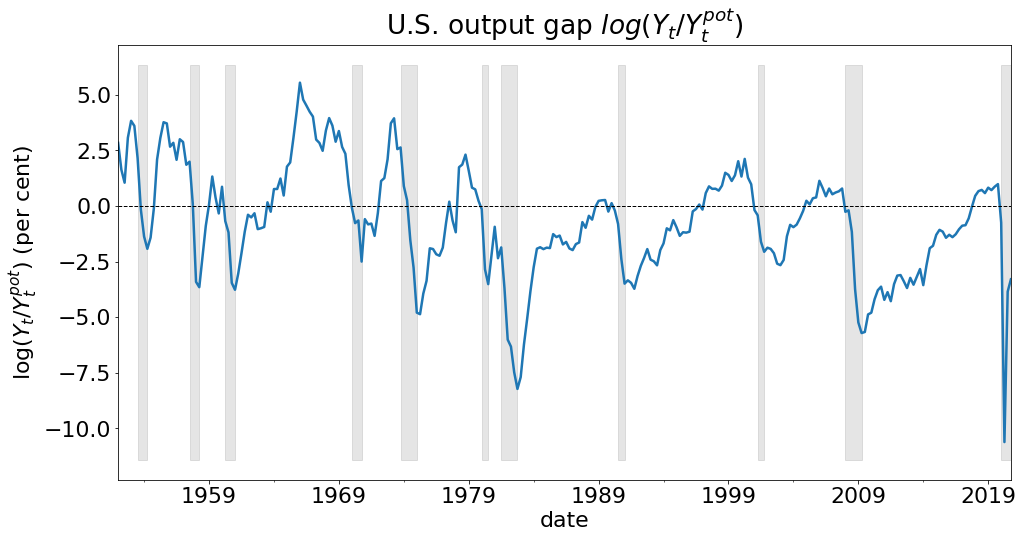

In [92]:
(100*(np.log(series['y'])-np.log(series['ypot']))).plot()
yl, yh = plt.ylim()
plt.ylabel(r'$\log(Y_t/Y_{t}^{pot})$ (per cent)')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('U.S. output gap $log(Y_t/Y_t^{pot})$')
plt.savefig(f'Export/outputgap.pdf', format='pdf', transparent=True);

Phillips curve examination

In [93]:
series['cpi']

date
1952-03-31     26.416667
1952-06-30     26.486667
1952-09-30     26.666667
1952-12-31     26.696667
1953-03-31     26.620000
                 ...    
2019-12-31    257.859667
2020-03-31    258.500000
2020-06-30    256.472000
2020-09-30    259.421333
2020-12-31    260.983000
Freq: Q-DEC, Name: cpi, Length: 276, dtype: float64

In [94]:
pi_yoy=100*(series['cpi']-series['cpi'].shift(4))/series['cpi'].shift(4)
pidiff=pi_yoy.diff(4) # change in inflation over the previous year!
ygap=(100*(series['y']-series['ypot'])/series['ypot'])
pi_qd=pi_yoy-0.5*pi_yoy.shift(-4)

In [95]:
pi_qd

date
1952-03-31         NaN
1952-06-30         NaN
1952-09-30         NaN
1952-12-31         NaN
1953-03-31    0.143620
                ...   
2019-12-31    1.420846
2020-03-31         NaN
2020-06-30         NaN
2020-09-30         NaN
2020-12-31         NaN
Freq: Q-DEC, Name: cpi, Length: 276, dtype: float64

In [96]:
pidiff

date
1952-03-31         NaN
1952-06-30         NaN
1952-09-30         NaN
1952-12-31         NaN
1953-03-31         NaN
                ...   
2019-12-31   -0.190249
2020-03-31    0.491175
2020-06-30   -1.418592
2020-09-30   -0.501920
2020-12-31   -0.815220
Freq: Q-DEC, Name: cpi, Length: 276, dtype: float64

In [97]:
df=pd.DataFrame(data={'pi':pi_yoy[9:-4],'pidiff':pidiff[9:-4], 'ygap':ygap[9:-4], 'pi_qd':pi_qd[9:-4]})
df.corr()

,pi,pidiff,ygap,pi_qd
pi,1.000000,0.323810,-0.058485,0.892390
pidiff,0.323810,1.000000,0.433887,0.230394
ygap,-0.058485,0.433887,1.000000,-0.224731
pi_qd,0.892390,0.230394,-0.224731,1.000000


In [98]:
df

,pi,pidiff,ygap,pi_qd
date,,,,
1954-06-30,0.711078,-0.169869,-1.909184,0.995978
1954-09-30,-0.012418,-0.674918,-1.413901,0.105565
1954-12-31,-0.495847,-1.220033,-0.117571,-0.682717
1955-03-31,-0.593619,-1.845810,2.112337,-0.718028
1955-06-30,-0.569801,-1.280878,3.105948,-1.093035
...,...,...,...,...
2018-12-31,2.216722,0.101232,0.579470,1.203486
2019-03-31,1.607811,-0.618489,0.827499,0.558318
2019-06-30,1.848811,-0.833832,0.715465,1.633702


In [99]:
df['label']=df.index.year

In [100]:
df

,pi,pidiff,ygap,pi_qd,label
date,,,,,
1954-06-30,0.711078,-0.169869,-1.909184,0.995978,1954
1954-09-30,-0.012418,-0.674918,-1.413901,0.105565,1954
1954-12-31,-0.495847,-1.220033,-0.117571,-0.682717,1954
1955-03-31,-0.593619,-1.845810,2.112337,-0.718028,1955
1955-06-30,-0.569801,-1.280878,3.105948,-1.093035,1955
...,...,...,...,...,...
2018-12-31,2.216722,0.101232,0.579470,1.203486,2018
2019-03-31,1.607811,-0.618489,0.827499,0.558318,2019
2019-06-30,1.848811,-0.833832,0.715465,1.633702,2019


Version in levels

                            OLS Regression Results                            
Dep. Variable:                     pi   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8958
Date:                Fri, 12 Mar 2021   Prob (F-statistic):              0.345
Time:                        20:27:34   Log-Likelihood:                -643.15
No. Observations:                 263   AIC:                             1290.
Df Residuals:                     261   BIC:                             1297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4750      0.180     19.282      0.0

Text(0, 0.5, '$\\pi_t$  (annualized %)')

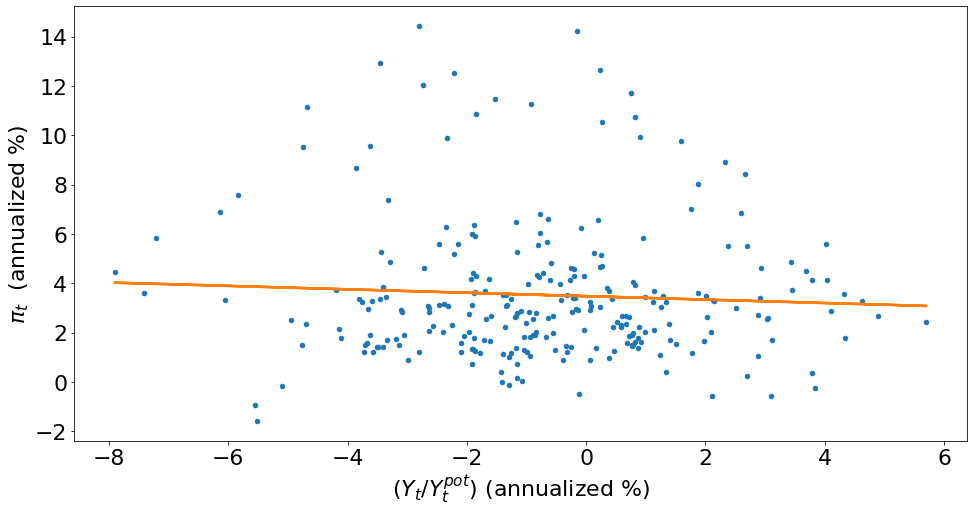

In [101]:
fitted, regparams=reg_fit(df['pi'],df['ygap'], verbose=True)
df.plot.scatter(x='ygap', y='pi')
plt.plot(df['ygap'], fitted, color='tab:orange')
plt.xlabel(r'$(Y_t/Y_t^{pot})$ (annualized %)')
plt.ylabel(r'$\pi_t$  (annualized %)')
#plt.legend()
#plt.xlim(-12,16)
#plt.ylim(-12,16)

                            OLS Regression Results                            
Dep. Variable:                 pidiff   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     60.53
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           1.69e-13
Time:                        20:27:34   Log-Likelihood:                -506.74
No. Observations:                 263   AIC:                             1017.
Df Residuals:                     261   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.107      2.345      0.0

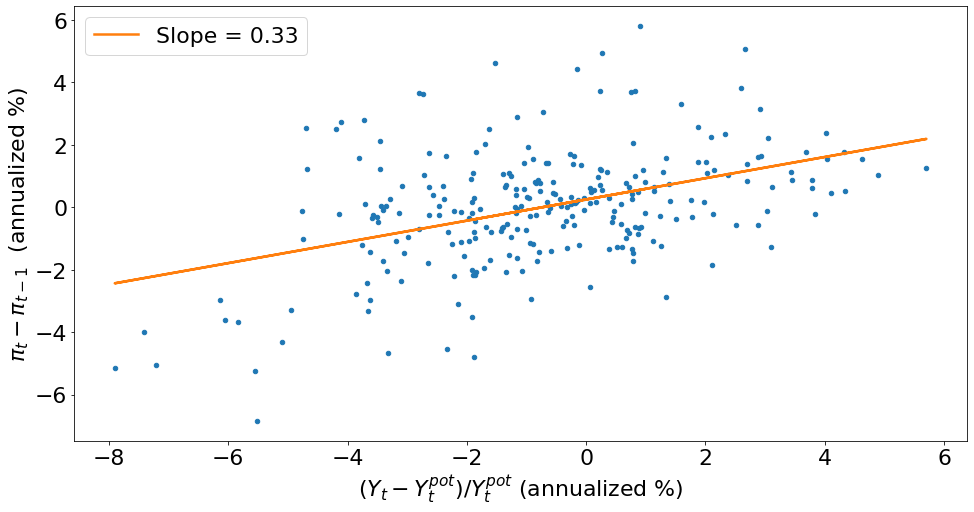

In [102]:
fitted, regparams=reg_fit(df['pidiff'],df['ygap'], verbose=True)
ax=df.plot.scatter(x='ygap', y='pidiff')
# if I want to label the dates
#df[['ygap','pidiff','label']].apply(lambda x: ax.text(*x),axis=1)
# Bottom left are 1982 and 2009. Top right are 
plt.plot(df['ygap'], fitted, color='tab:orange', label='Slope = 0.33')
plt.legend()
plt.xlabel(r'$(Y_t-Y_t^{pot})/Y_t^{pot}$ (annualized %)')
plt.ylabel(r'$\pi_t - \pi_{t-1}$  (annualized %)')
plt.savefig(f'Export/phillipscurvedelta.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                  pi_qd   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     13.88
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           0.000239
Time:                        20:27:34   Log-Likelihood:                -537.73
No. Observations:                 263   AIC:                             1079.
Df Residuals:                     261   BIC:                             1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6236      0.121     13.451      0.0

Text(0, 0.5, '$\\pi_t - \\pi_{t+1}$  (annualized %)')

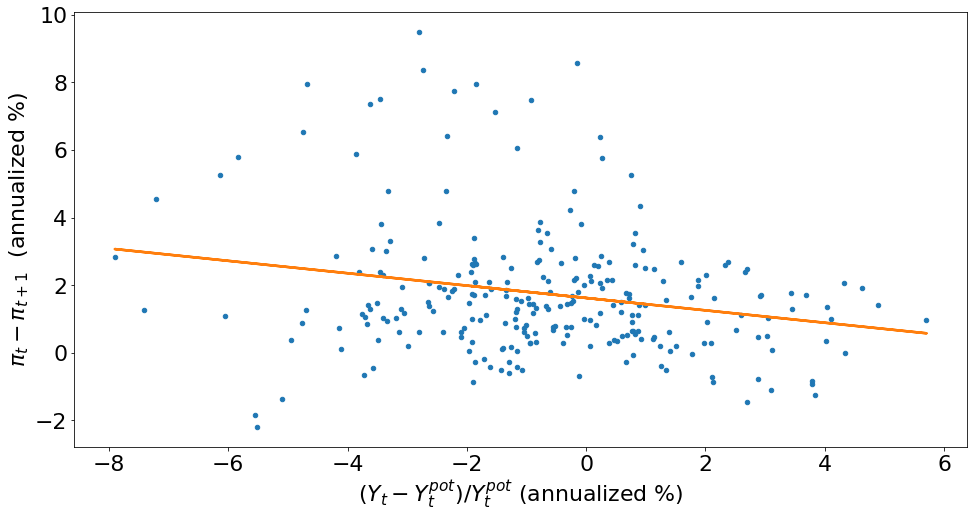

In [103]:
fitted, regparams=reg_fit(df['pi_qd'],df['ygap'], verbose=True)
ax=df.plot.scatter(x='ygap', y='pi_qd')
# if I want to label the dates
#df[['ygap','pidiff','label']].apply(lambda x: ax.text(*x),axis=1)
plt.plot(df['ygap'], fitted, color='tab:orange')
plt.xlabel(r'$(Y_t-Y_t^{pot})/Y_t^{pot}$ (annualized %)')
plt.ylabel(r'$\pi_t - \pi_{t+1}$  (annualized %)')

Really jumps at you that the data likes the actual difference version much better than the QD version

In [104]:
seriesd = data_load.get_fred_data('D','same_def')
seriesd=seriesd.loc['2014-01-01':'2021-03-12']

Get recession indicator for whole period

In [105]:
seriesd['USREC'].interpolate(method='linear', inplace=True)
seriesd['dgs10'].interpolate(method='linear', inplace=True)
seriesd['breakeven10'].interpolate(method='linear', inplace=True)

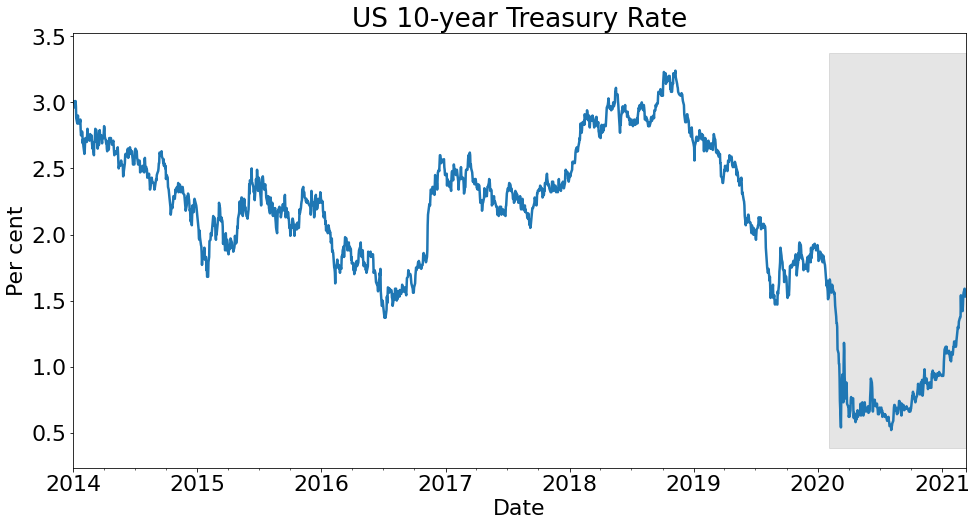

In [106]:
seriesd['dgs10'].plot()
# Draw shaded for recession
yl,yh=plt.ylim()
plt.fill_between(seriesd.index, yl, yh, where=seriesd['USREC'].values, color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Per cent')
plt.title('US 10-year Treasury Rate')
plt.savefig(f'Export/treasury10year.pdf', format='pdf', transparent=True);

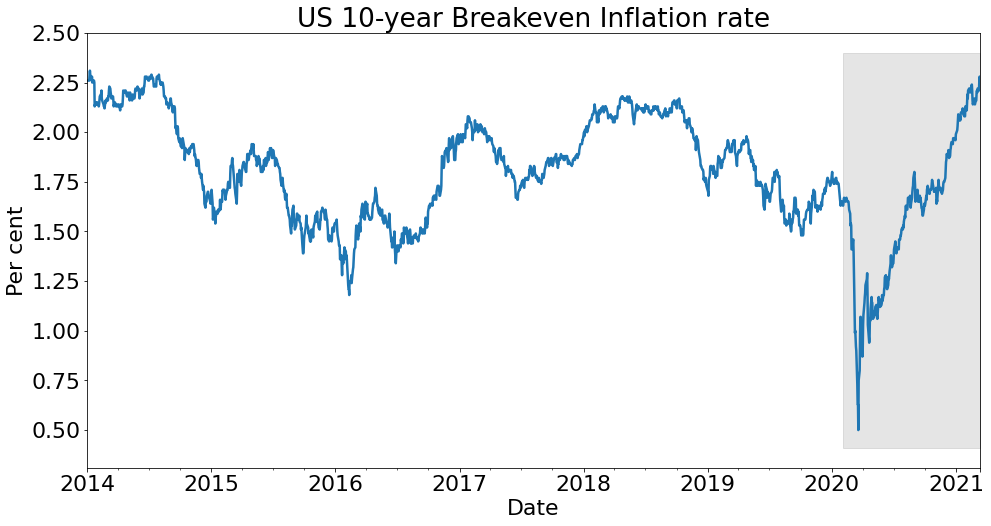

In [107]:
seriesd['breakeven10'].plot()
# Draw shaded for recession
yl,yh=plt.ylim()
plt.fill_between(seriesd.index, yl, yh, where=seriesd['USREC'].values, color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Per cent')
plt.title('US 10-year Breakeven Inflation rate')
plt.savefig(f'Export/breakeven10year.pdf', format='pdf', transparent=True);